/g/data2/v10/public/modules/agdc-py2-env/20170209/envs/agdc/lib/python2.7/site-packages/ipykernel/__main__.py:10: DeprecationWarning: Collection.__next__() is buggy and will be removed in Fiona 2.0. Switch to `next(iter(collection))`.


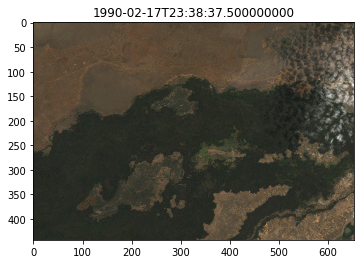

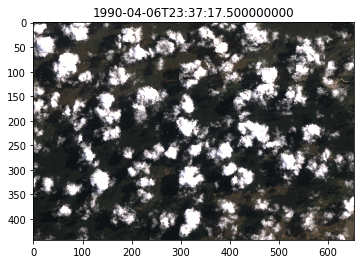

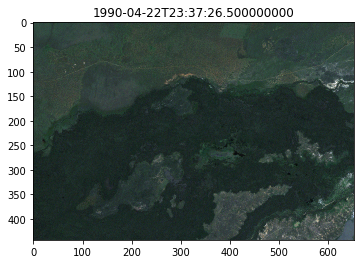

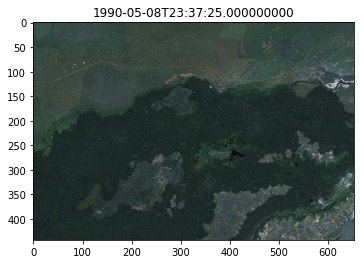

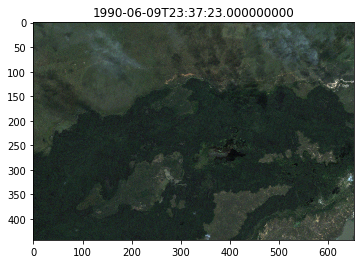

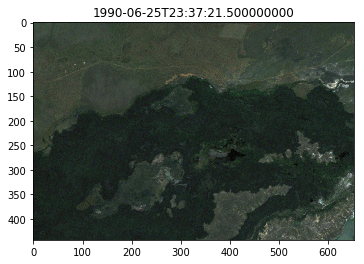

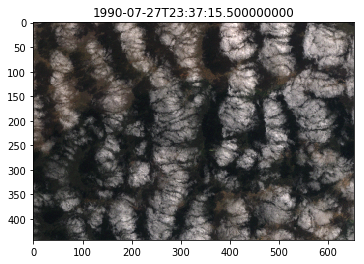

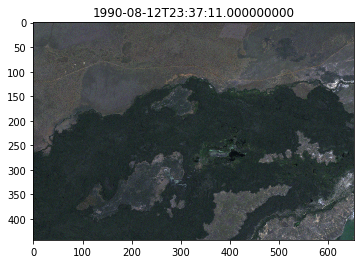

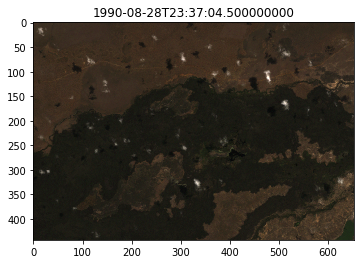

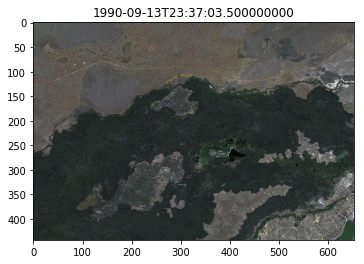

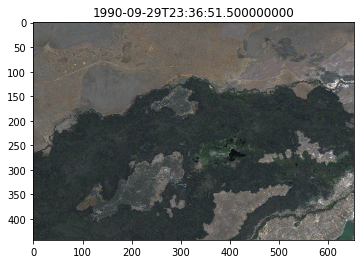

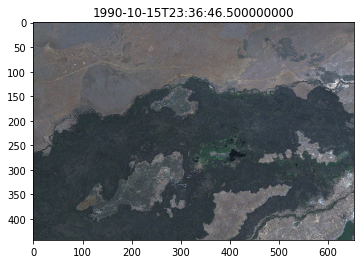

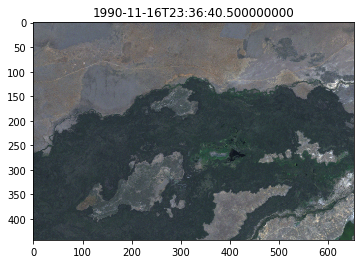

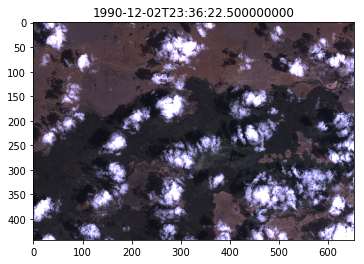

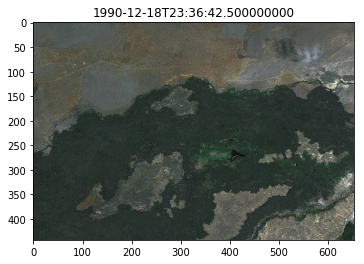

In [103]:
import fiona
import shapely.geometry
import datacube



shape_file = 'BurdekinTestshp1.shp'
with fiona.open(shape_file) as shapes:
    geom_crs = str(shapes.crs_wkt)
    geom = shapely.geometry.shape(next(shapes)['geometry'])

query = {
        'time': ('1990-01-01', '1991-01-01'),
        'x': (geom.bounds[0], geom.bounds[2]),
        'y': (geom.bounds[1], geom.bounds[3]),
        'crs': geom_crs
    }

dc = datacube.Datacube(app='test')
rgb = dc.load(product='ls5_nbar_albers', measurements=['red', 'green', 'blue'], 
                 group_by='solar_day', stack='color', **query).transpose('time', 'y', 'x', 'color')


# mask = geometry_mask(warp_geometry(geom, query['crs'], data.crs.wkt), data.geobox, invert=True)
fake_saturation = 4500
clipped_visible = rgb.where(rgb<fake_saturation).fillna(fake_saturation)
max_val = clipped_visible.max(['y', 'x'])
#percentile_val = clipped_visible.quantile(0.95,dim =['y', 'x'])
scaled_3bands = (clipped_visible / max_val)


#data.red.plot.imshow(col='time', col_wrap=5)
bb=sorted(scaled_3bands.time.data)
for n, i in enumerate(bb):
    #fig, axes = plt.subplots(1,1, figsize=(5,4))
    #ax1 = fig.add_subplot(gs1[0])
    plt.imshow(scaled_3bands.isel(time=n))
    plt.title(str(i))
    plt.show()


In [48]:
plt.gcf().canvas.get_supported_filetypes_grouped()

{u'Encapsulated Postscript': [u'eps'],
 u'Joint Photographic Experts Group': [u'jpeg', u'jpg'],
 u'PGF code for LaTeX': [u'pgf'],
 u'Portable Document Format': [u'pdf'],
 u'Portable Network Graphics': [u'png'],
 u'Postscript': [u'ps'],
 u'Raw RGBA bitmap': [u'raw', u'rgba'],
 u'Scalable Vector Graphics': [u'svg', u'svgz'],
 u'Tagged Image File Format': [u'tif', u'tiff']}

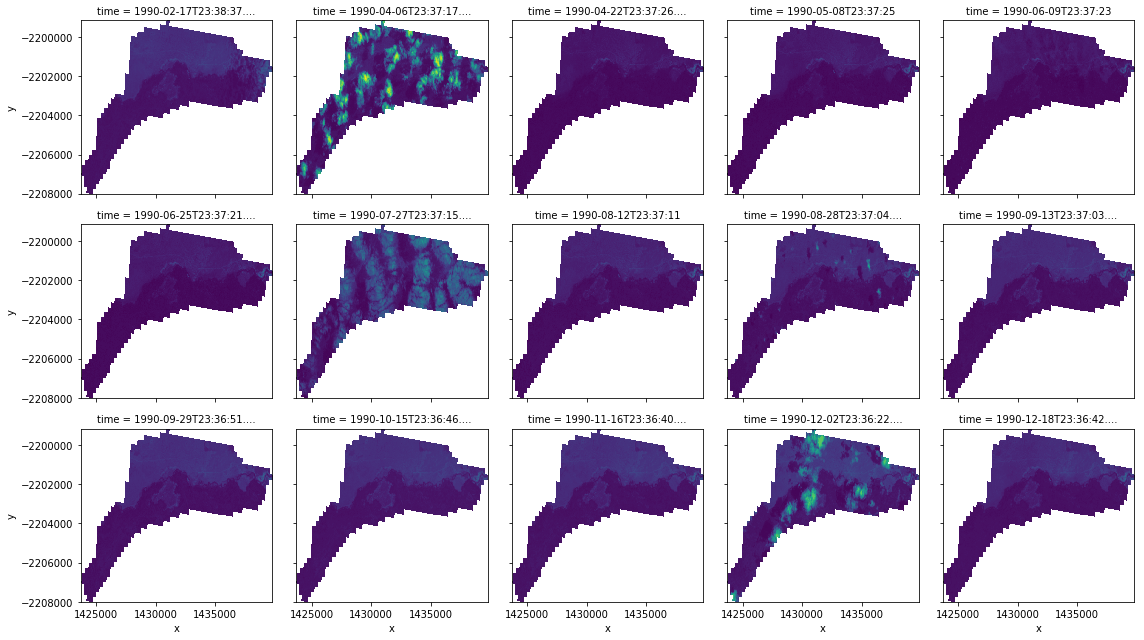

In [104]:
import fiona
import shapely.geometry
import datacube
import rasterio.features
from datacube.utils import geometry
from datacube.storage.masking import mask_valid_data as mask_invalid_data





def warp_geometry(geom, src_crs, dst_crs):
    """
    warp geometry from src_crs to dst_crs
    """
    return shapely.geometry.shape(rasterio.warp.transform_geom(src_crs, dst_crs, shapely.geometry.mapping(geom)))


def geometry_mask(geoms, geobox, all_touched=False, invert=False):
    """
    rasterize geometry into a binary mask where pixels that overlap geometry are False
    """
    return rasterio.features.geometry_mask([geom.to_crs(geobox.crs) for geom in geoms],
                                           out_shape=geobox.shape,
                                           transform=geobox.affine,
                                           all_touched=all_touched,
                                           invert=invert)


shape_file = 'BurdekinTestshp1.shp'
with fiona.open(shape_file) as shapes:
    geom_crs = geometry.CRS(shapes.crs_wkt)
    first_geo = next(iter(shapes))['geometry']
    #first_geo = next(shapes)['geometry']
    #geopolygon = geometry.Geometry(geom, geom_crs)
    geom = geometry.Geometry(first_geo, crs=geom_crs)
    geom_bs = shapely.geometry.shape(next(iter(shapes))['geometry'])
    
query = {
        'time': ('1990-01-01', '1991-01-01'),
#          'x': (geom.bounds[0], geom.bounds[2]),
#          'y': (geom.bounds[1], geom.bounds[3]),
        'geopolygon': geom 
#         'crs': geom_crs,
    }

dc = datacube.Datacube(app='test')
data = dc.load(product='ls5_nbar_albers',  
                 group_by='solar_day', measurements=['red', 'green', 'blue'], **query)
mask = geometry_mask([geom], data.geobox, invert=True)
data = data.where(mask)

data.red.plot.imshow(x=data.crs.dimensions[1], y=data.crs.dimensions[0],
                col='time', col_wrap=5, add_colorbar=False)





In [65]:
geometry.Geometry(geom.__geo_interface__, geom_crs)

Geometry(POLYGON ((145.7475 -19.805,145.79 -19.805,145.795 -19.805,145.795 -19.8075,145.7975 -19.8075,145.7975 -19.81,145.8025 -19.81,145.8025 -19.8125,145.8225 -19.8125,145.825 -19.8125,145.825 -19.815,145.8275 -19.815,145.8275 -19.8175,145.825 -19.8175,145.825 -19.82,145.8225 -19.82,145.8225 -19.8275,145.82 -19.8275,145.82 -19.83,145.8175 -19.83,145.8175 -19.8325,145.805 -19.8325,145.805 -19.835,145.8025 -19.835,145.7975 -19.835,145.7975 -19.8375,145.795 -19.8375,145.7625 -19.8375,145.7625 -19.84,145.755 -19.84,145.755 -19.8425,145.7475 -19.8425,145.7475 -19.845,145.7425 -19.845,145.7425 -19.8475,145.73 -19.8475,145.73 -19.85,145.725 -19.85,145.725 -19.8525,145.72 -19.8525,145.72 -19.855,145.7175 -19.855,145.7175 -19.8575,145.715 -19.8575,145.715 -19.86,145.7125 -19.86,145.7125 -19.8625,145.71 -19.8625,145.71 -19.865,145.7075 -19.865,145.7075 -19.8675,145.705 -19.8675,145.705 -19.87,145.7025 -19.87,145.7025 -19.875,145.7 -19.875,145.7 -19.8775,145.6975 -19.8775,145.6975 -19.88,145.69

In [72]:
geom

{'coordinates': [[(145.74750000000006, -19.80499999999995),
   (145.79000000000008, -19.80499999999995),
   (145.79500000000007, -19.80499999999995),
   (145.79500000000007, -19.807499999999948),
   (145.7975, -19.807499999999948),
   (145.7975, -19.809999999999945),
   (145.8025, -19.809999999999945),
   (145.8025, -19.812499999999943),
   (145.8225000000001, -19.812499999999943),
   (145.82500000000005, -19.812499999999943),
   (145.82500000000005, -19.81499999999994),
   (145.8275000000001, -19.81499999999994),
   (145.8275000000001, -19.81749999999994),
   (145.82500000000005, -19.81749999999994),
   (145.82500000000005, -19.819999999999936),
   (145.8225000000001, -19.819999999999936),
   (145.8225000000001, -19.82749999999993),
   (145.82000000000005, -19.82749999999993),
   (145.82000000000005, -19.829999999999927),
   (145.8175000000001, -19.829999999999927),
   (145.8175000000001, -19.832499999999982),
   (145.80500000000006, -19.832499999999982),
   (145.80500000000006, -19.8